### Gene imputation

In [1]:
import scanpy as sc
import pandas as pd
import numpy as np
import squidpy as sq
import matplotlib.pyplot as plt

adata_res = sc.read("/home/tengliu/Paper6-NC/GMM-VAGE-Teng/151673-R-GAE-all2+impu+2000hvg/mouse_brain_imputation.h5ad")

In [2]:
adata_res

AnnData object with n_obs × n_vars = 2688 × 2688
    obs: 'in_tissue', 'array_row', 'array_col', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_50_genes', 'pct_counts_in_top_100_genes', 'pct_counts_in_top_200_genes', 'pct_counts_in_top_500_genes', 'total_counts_mt', 'log1p_total_counts_mt', 'pct_counts_mt', 'n_counts', 'leiden', 'cluster', 'pre_label'
    var: 'gene_ids', 'feature_types', 'genome', 'mt', 'n_cells_by_counts', 'mean_counts', 'log1p_mean_counts', 'pct_dropout_by_counts', 'total_counts', 'log1p_total_counts', 'n_cells', 'highly_variable', 'highly_variable_rank', 'means', 'variances', 'variances_norm'
    uns: 'ari_list', 'cluster_colors', 'hvg', 'leiden', 'leiden_colors', 'log1p', 'neighbors', 'pca', 'rank_genes_groups', 'spatial', 'umap'
    obsm: 'X_pca', 'X_umap', 'adj', 'distance_matrix', 'embedding', 'feat_mat', 'graph_neigh', 'spatial'
    varm: 'PCs'
    layers: 'Recons_features'
    obsp: 'connectivities', '

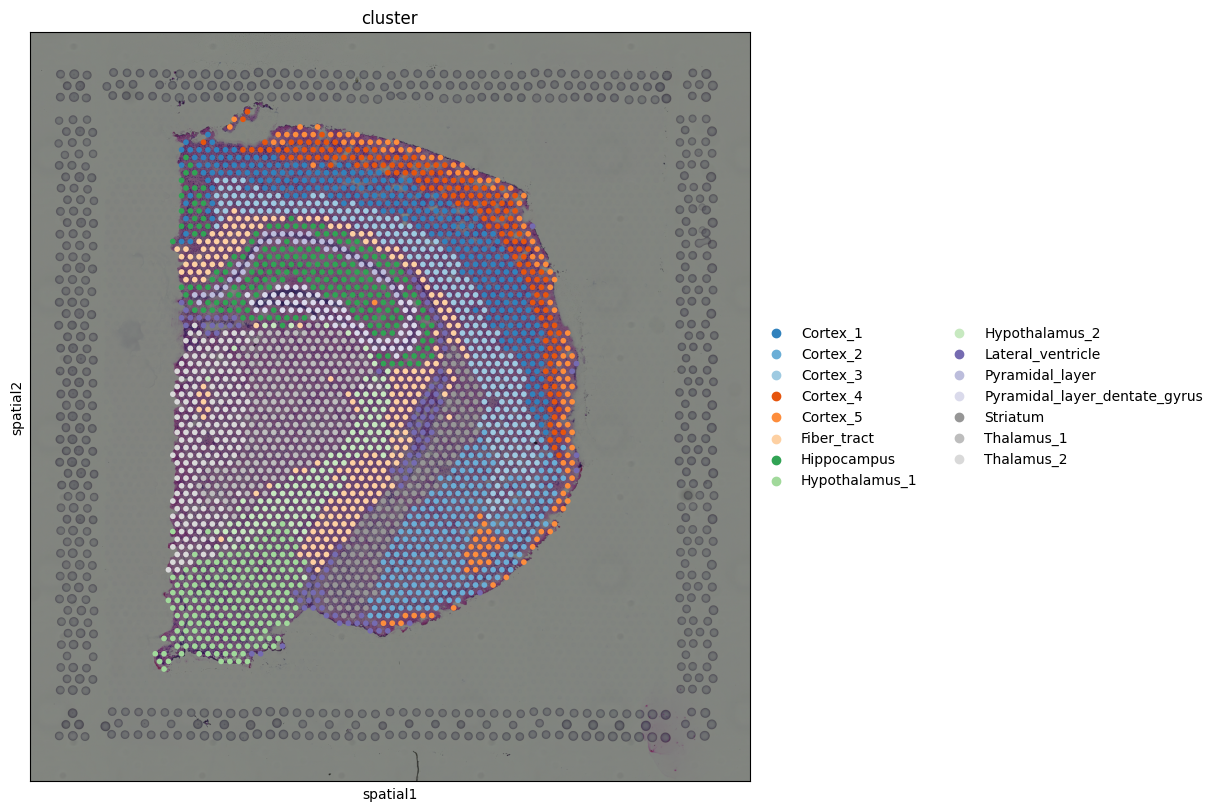

In [6]:
sq.pl.spatial_scatter(adata_res, color=[ "cluster"],figsize=(12,8),palette="tab20c",save="ground_truth.pdf")

### Single gene before and after imputation

In [7]:
import matplotlib.pyplot as plt
import scanpy as sc
adata_res = sc.read("/home/tengliu/Paper6-NC/GMM-VAGE-Teng/151673-R-GAE-all2+impu+2000hvg/mouse_brain_imputation.h5ad")
gene_list = ["4732440D04Rik", "St18", "1700034P13Rik","Sulf1","Eya1","Tfap2b","Gm29107","Col9a1","Col19a1","Neurl3","Gm33533",
             "Il1r1","Tmem182","Gm29260","Pantr1","Gm28782","Fhl2","1500015O10Rik","Col3a1"]
# plot_gene = 'Slc39a10'
for plot_gene in gene_list:
    fig, axs = plt.subplots(1, 2, figsize=(10, 6))
    sc.pl.spatial(adata_res, img_key="hires", cmap= "coolwarm",color=plot_gene, show=False, ax=axs[0], title='RAW_'+plot_gene, vmax='p99')
    sc.pl.spatial(adata_res, img_key="hires", color=plot_gene, cmap= "coolwarm",show=False, ax=axs[1], title='STGMVA_'+plot_gene, layer='Recons_features', vmax='p99',save='_combined_'+plot_gene+'.pdf')

### 小提琴图 ground truth

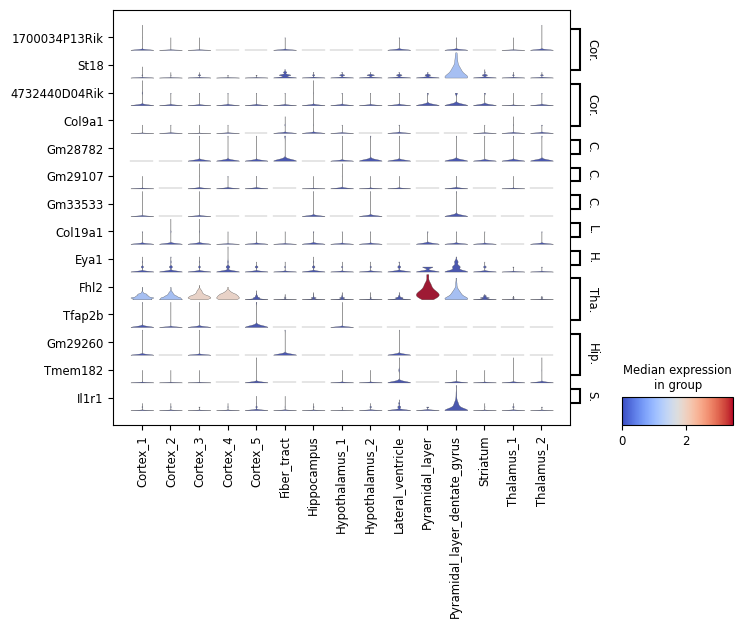

In [8]:
import scanpy as sc
import pandas as pd
import numpy as np
import squidpy as sq
import matplotlib.pyplot as plt
adata = sq.datasets.visium_hne_adata()
marker_genes_dict = {
    'Cortex_4': ['1700034P13Rik',"St18"],
    'Cortex_2': ['4732440D04Rik',"Col9a1"],
    'Cortex_1': ['Gm28782'],
    'Cortex_3': ['Gm29107'],
    'Cortex_5': ['Gm33533'],
    'Lateral_ventricle': ["Col19a1"],
    'Hypothalamus_2': ['Eya1'],
    'Thalamus_2': ["Fhl2","Tfap2b"],
    'Hippocampus': ['Gm29260',"Tmem182"],
    'Striatum': ['Il1r1'],
}
ax = sc.pl.stacked_violin(adata, marker_genes_dict, cmap="coolwarm",figsize=(8,5),groupby='cluster', 
                          swap_axes=True, dendrogram=False,
                          save="_ground_truth.pdf")

### 小提琴图 GMM_VGAE

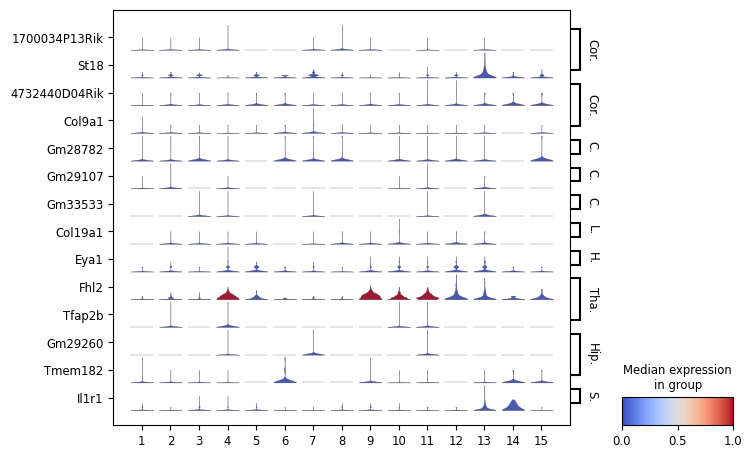

In [9]:
import scanpy as sc
import pandas as pd
import numpy as np
import squidpy as sq
import matplotlib.pyplot as plt
adata_res = sc.read("/home/tengliu/Paper6-NC/GMM-VAGE-Teng/151673-R-GAE-all2+impu+2000hvg/mouse_brain_imputation.h5ad")
marker_genes_dict = {
    'Cortex_4': ['1700034P13Rik',"St18"],
    'Cortex_2': ['4732440D04Rik',"Col9a1"],
    'Cortex_1': ['Gm28782'],
    'Cortex_3': ['Gm29107'],
    'Cortex_5': ['Gm33533'],
    'Lateral_ventricle': ["Col19a1"],
    'Hypothalamus_2': ['Eya1'],
    'Thalamus_2': ["Fhl2","Tfap2b"],
    'Hippocampus': ['Gm29260',"Tmem182"],
    'Striatum': ['Il1r1'],
}
ax = sc.pl.stacked_violin(adata_res, marker_genes_dict,cmap="coolwarm", figsize=(8,5),groupby='pre_label', 
                          swap_axes=True, dendrogram=False,
                          save="_stgmva.pdf")